### Predicting Hazardous NEOs (Nearest Earth Objects)

In this project, you will work with a real-world dataset that tracks Nearest Earth Objects (NEOs)
observed by NASA from 1910 to 2024. The dataset contains 338,199 records, each representing
an object in space that has been monitored for its proximity to Earth. Some of these objects are
classified by NASA as "is_hazardous," indicating that they pose a potential danger to our plane
Your task is to train a machine learning model that can accurately predict whether a NEO is
hazardous or not. This is a critical task, as the ability to accurately identify dangerous objects
could be vital for planetary defense.

### download the dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/data?select=nearest-earth-objects%281910-2024%29.csv")

Skipping, found downloaded files in "./nasa-nearest-earth-objects-1910-2024" (use force=True to force download)


### 1- Data Importing and Cleaning:

In [3]:
import pandas as pd

df = pd.read_csv("/content/nasa-nearest-earth-objects-1910-2024/nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [4]:
df.shape

(338199, 9)

In [5]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [7]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


- The missing values are 28, while the total number of rows are: 338199.
- Percentage of the missing data is: 0.00827%, so removing them is better

In [8]:
df_clean = df.dropna()
df_clean.shape

(338171, 9)

- check duplicates.

In [9]:
df_clean.duplicated().sum()

0

- data has no duplicates to remove.

In [10]:
df.nunique()

,0
neo_id,33514
name,33514
absolute_magnitude,1778
estimated_diameter_min,1778
estimated_diameter_max,1778
orbiting_body,1
relative_velocity,338189
miss_distance,337826
is_hazardous,2


- orbiting body is common for all of them, so let's remove it.

In [11]:
df_clean.drop("orbiting_body", axis=1, inplace=True)
df_clean.head()

<ipython-input-11-1423dabd25c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop("orbiting_body", axis=1, inplace=True)


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


### 2- Exploratory Data Analysis (EDA):

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<ipython-input-13-2f279288214b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_hazardous', data=df_clean, palette=custom_palette, legend=False)


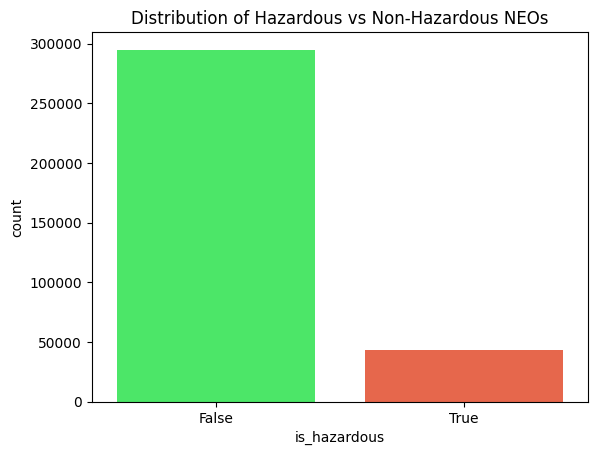

In [13]:
# Distribution of 'is_hazardous'

# Define custom colors
custom_palette = ["#33FF57", "#FF5733"]  # Example: Red for hazardous, Green for non-hazardous

# Plot with custom colors
sns.countplot(x='is_hazardous', data=df_clean, palette=custom_palette, legend=False)
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show();

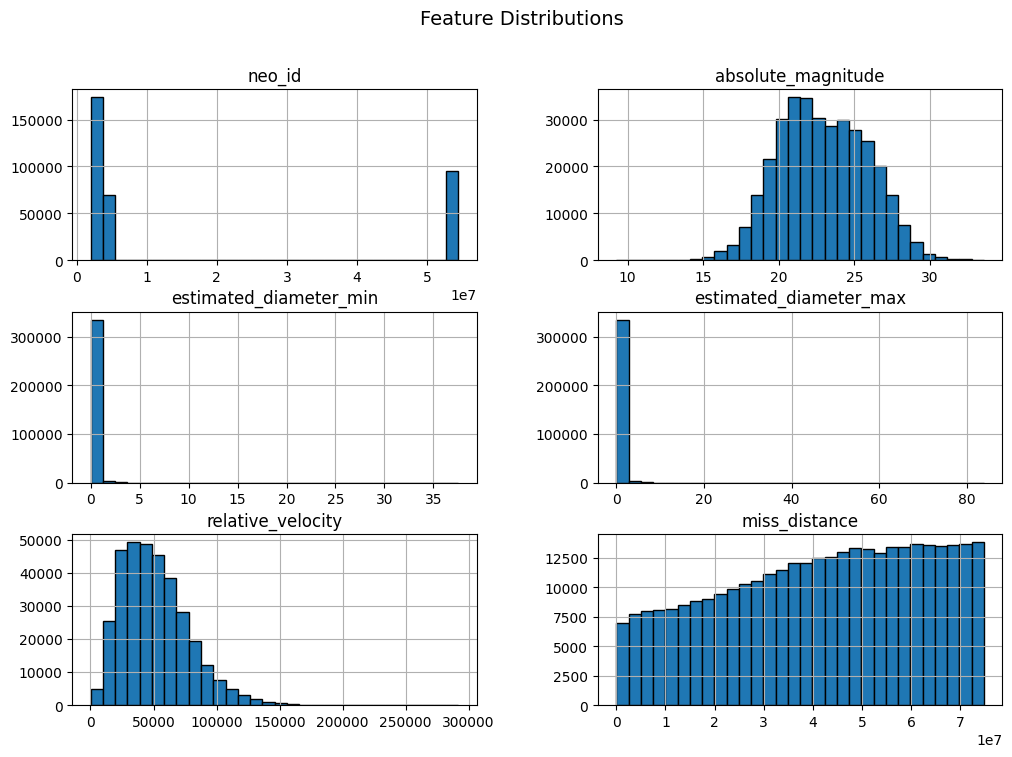

In [14]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

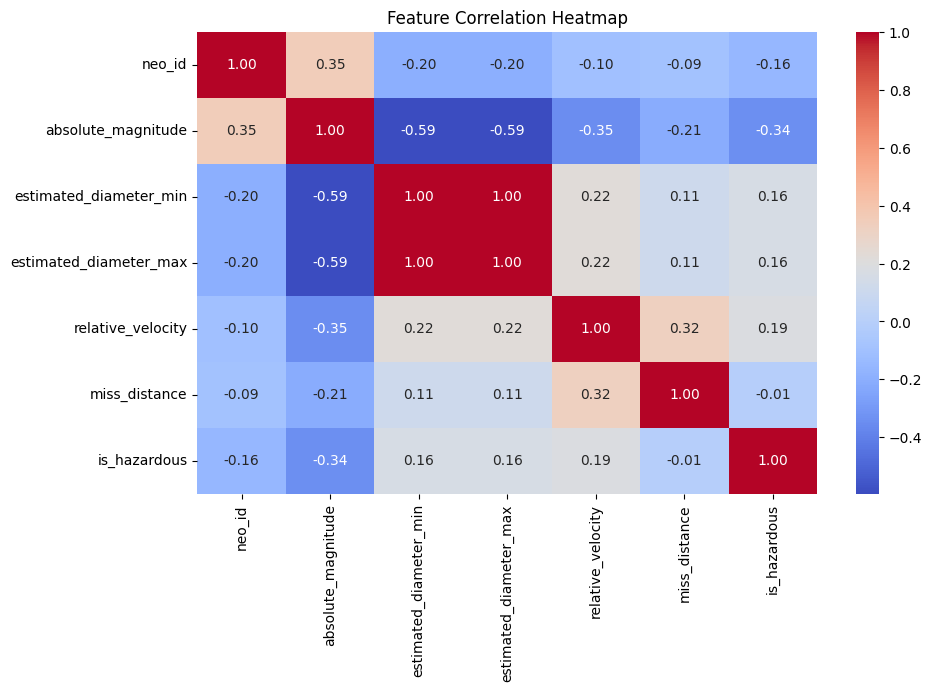

In [15]:
import numpy as np

# Compute correlation
corr = df_clean[["neo_id", "absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max",
                 "relative_velocity", "miss_distance", "is_hazardous"]].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Data Processing

##### 1. feature engineering

- instead of having `estimated_diameter_min` and `estimated_diameter_max`, let's average them in a new column feature called `estimated_diameter`.

In [16]:
cleaned_data = df_clean.copy()
cleaned_data['estimated_diameter'] = (cleaned_data['estimated_diameter_min'] + cleaned_data['estimated_diameter_max']) / 2
cleaned_data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,estimated_diameter
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,71745.401048,5.814362e+07,False,0.639061
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,109949.757148,5.580105e+07,True,0.858109
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,24865.506798,6.720689e+07,False,0.220568
3,3132126,(2002 PB),20.63,0.198863,0.444672,78890.076805,3.039644e+07,False,0.321768
4,3557844,(2011 DW),22.70,0.076658,0.171412,56036.519484,6.311863e+07,False,0.124035


- drop the `estimated_diameter_min` and `estimated_diameter_max` columns from the `cleaned_data` dataframe

In [17]:
cleaned_data.drop(['estimated_diameter_min', 'estimated_diameter_max'], axis=1, inplace=True)
cleaned_data.head()

,neo_id,name,absolute_magnitude,relative_velocity,miss_distance,is_hazardous,estimated_diameter
0,2162117,162117 (1998 SD15),19.14,71745.401048,5.814362e+07,False,0.639061
1,2349507,349507 (2008 QY),18.50,109949.757148,5.580105e+07,True,0.858109
2,2455415,455415 (2003 GA),21.45,24865.506798,6.720689e+07,False,0.220568
3,3132126,(2002 PB),20.63,78890.076805,3.039644e+07,False,0.321768
4,3557844,(2011 DW),22.70,56036.519484,6.311863e+07,False,0.124035


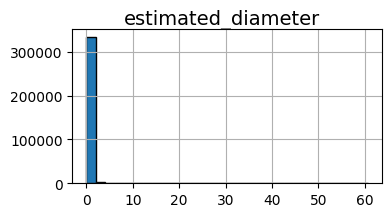

In [18]:
cleaned_data['estimated_diameter'].hist(figsize=(4, 2), bins=30, edgecolor='black')
plt.suptitle("estimated_diameter", fontsize=14)
plt.show()

In [19]:
cleaned_data['estimated_diameter'].skew()

30.963263588852758

- normalizing the `relative_velocity` to solve the scale value and the right swewing as well.

In [20]:
from sklearn.model_selection import train_test_split

# Split features and target
X = cleaned_data.drop(columns=['is_hazardous', 'name'])
y = cleaned_data['is_hazardous']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both
X_train['relative_velocity'] = scaler.fit_transform(X_train[['relative_velocity']])
X_test['relative_velocity'] = scaler.transform(X_test[['relative_velocity']])  # Use transform, not fit_transform

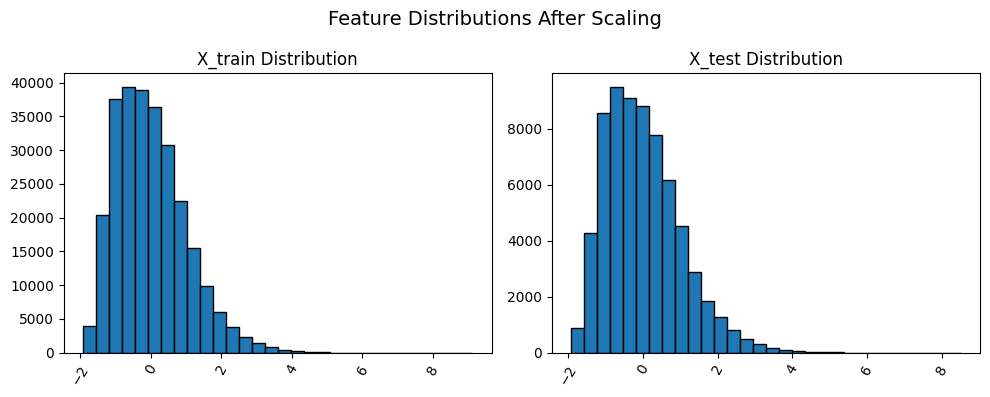

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot X_train
axes[0].hist(X_train['relative_velocity'], bins=30, edgecolor='black')
axes[0].set_title("X_train Distribution")
axes[0].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Plot X_test
axes[1].hist(X_test['relative_velocity'], bins=30, edgecolor='black')
axes[1].set_title("X_test Distribution")
axes[1].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Adjust layout and show
plt.suptitle("Feature Distributions After Scaling", fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
X_train['relative_velocity'].skew()

0.848981635946247

In [24]:
X_train.head()

,neo_id,absolute_magnitude,relative_velocity,miss_distance,estimated_diameter
118008,3715703,22.26,0.226759,5.611973e+07,0.151895
120378,54431700,21.29,0.852273,3.488612e+07,0.237434
240600,2523732,20.66,1.848906,6.929250e+07,0.317353
228964,54417551,27.86,-0.942463,2.428529e+07,0.011522
53169,3744695,25.60,-0.501739,2.857068e+07,0.032624


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit on training data and transform both
X_train['miss_distance'] = scaler.fit_transform(X_train[['miss_distance']])
X_test['miss_distance'] = scaler.transform(X_test[['miss_distance']])

In [26]:
X_train.head()

,neo_id,absolute_magnitude,relative_velocity,miss_distance,estimated_diameter
118008,3715703,22.26,0.226759,0.750255,0.151895
120378,54431700,21.29,0.852273,0.466352,0.237434
240600,2523732,20.66,1.848906,0.926380,0.317353
228964,54417551,27.86,-0.942463,0.324615,0.011522
53169,3744695,25.60,-0.501739,0.381912,0.032624


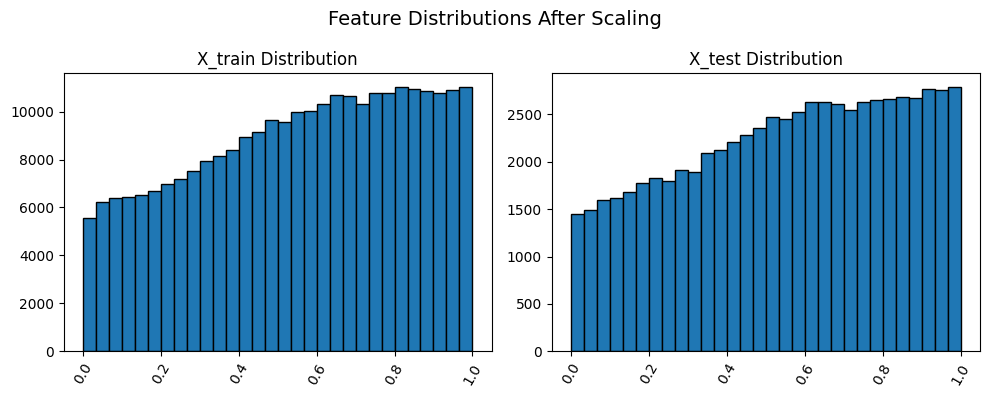

In [27]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot X_train
axes[0].hist(X_train['miss_distance'], bins=30, edgecolor='black')
axes[0].set_title("X_train Distribution")
axes[0].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Plot X_test
axes[1].hist(X_test['miss_distance'], bins=30, edgecolor='black')
axes[1].set_title("X_test Distribution")
axes[1].tick_params(axis='x', rotation=60)  # Rotate x-axis labels

# Adjust layout and show
plt.suptitle("Feature Distributions After Scaling", fontsize=14)
plt.tight_layout()
plt.show()

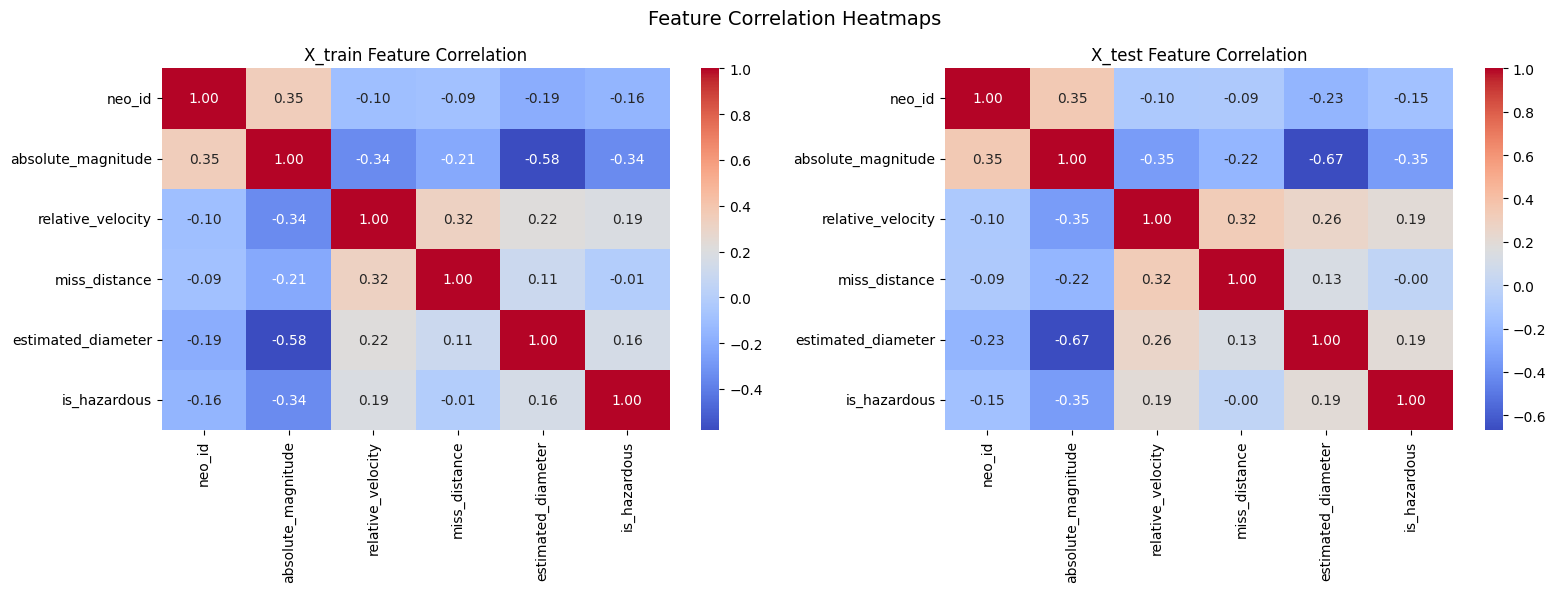

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation for X_train and X_test
train_corr = pd.concat([X_train, y_train], axis=1).corr()

test_corr = pd.concat([X_test, y_test], axis=1).corr()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for X_train
sns.heatmap(train_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("X_train Feature Correlation")

# Heatmap for X_test
sns.heatmap(test_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("X_test Feature Correlation")

# Adjust layout and show
plt.suptitle("Feature Correlation Heatmaps", fontsize=14)
plt.tight_layout()
plt.show()

##### 2. feature selection

- I'm going to use all the data in the `cleaned_data` dataframe, to train a model

In [32]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

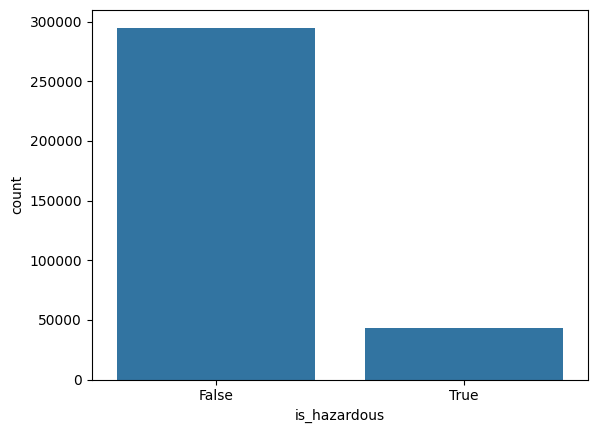

In [33]:
# Check class balance
sns.countplot(x=y)
plt.show()

### Try Xgboost classifier for this problem

In [34]:
from collections import Counter

# Compute class weights (Ratio of non-hazardous to hazardous)
class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]  # Non-hazardous / Hazardous

print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 6.835037215094558


In [35]:
 # Define XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,  # Handles class imbalance
    max_depth=6,
    learning_rate=0.05,
    n_estimators=200,
    min_child_weight=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [36]:
# Predict on test data
y_pred = xgb_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC Score
y_prob = xgb_model.predict_proba(X_test)[:,1]  # Get probability for class 1
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7671
              precision    recall  f1-score   support

       False       1.00      0.74      0.85     59002
        True       0.35      0.99      0.52      8633

    accuracy                           0.77     67635
   macro avg       0.67      0.86      0.68     67635
weighted avg       0.91      0.77      0.80     67635

ROC-AUC Score: 0.9339


### try decision tree for this problem

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}  # 0 = Not Hazardous, 1 = Hazardous

# Define Decision Tree model
dt_model = DecisionTreeClassifier(
    max_depth=6,  # Controls complexity
    min_samples_split=10,  # Prevents overfitting
    min_samples_leaf=5,  # Ensures stability
    class_weight=class_weight_dict,  # Balances the classes
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7317
ROC-AUC Score: 0.8938
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.69      0.82     59002
        True       0.32      0.99      0.49      8633

    accuracy                           0.73     67635
   macro avg       0.66      0.84      0.65     67635
weighted avg       0.91      0.73      0.78     67635



### make comparison of different models using `GridSearch` to choose the best one

In [39]:
cleaned_data['is_hazardous'].value_counts()

,count
is_hazardous,
False,295009
True,43162


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

def find_best_model(X_train, y_train, X_test, y_test):
    models = {
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="auc")
    }

    param_grid = {
        "Random Forest": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        },
        "Decision Tree": {
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        },
        "Logistic Regression": {
            "C": [0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        },
        "XGBoost": {
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [100, 200],
            "max_depth": [3, 6],
            "subsample": [0.8, 1.0]
        }
    }

    best_model = None
    best_score = 0
    best_name = ""

    for name, model in models.items():
        print(f"Training {name}...")
        grid = GridSearchCV(model, param_grid[name], scoring='roc_auc', cv=3, n_jobs=-1)
        grid.fit(X_train, y_train)

        # Evaluate the best model from grid search
        best_model_params = grid.best_params_
        best_model_instance = grid.best_estimator_
        y_pred_prob = best_model_instance.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_prob)

        print(f"{name} Best ROC-AUC: {roc_auc:.4f} with Params: {best_model_params}")

        # Check if this model is the best so far
        if roc_auc > best_score:
            best_score = roc_auc
            best_model = best_model_instance
            best_name = name

    print(f"\n🏆 Best Model: {best_name} with ROC-AUC: {best_score:.4f}")
    return best_model

# Example usage
best_model = find_best_model(X_train, y_train, X_test, y_test)

Training Random Forest...
Random Forest Best ROC-AUC: 0.9961 with Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Decision Tree...
Decision Tree Best ROC-AUC: 0.9283 with Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training Logistic Regression...
Logistic Regression Best ROC-AUC: 0.7838 with Params: {'C': 0.1, 'solver': 'lbfgs'}
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:09:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best ROC-AUC: 0.9595 with Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

🏆 Best Model: Random Forest with ROC-AUC: 0.9961


In [41]:
# Predict on test data
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9784
ROC-AUC Score: 0.9961
Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99     59002
        True       0.95      0.88      0.91      8633

    accuracy                           0.98     67635
   macro avg       0.97      0.94      0.95     67635
weighted avg       0.98      0.98      0.98     67635



### By applying `GridSearch`, the best model is `Random Forest`